In [3]:
from fastai.vision import *
from fastai import * 
from fastai.text import *
from pathlib import Path 
from tqdm import tqdm
import torchtext
from torchtext.data import Iterator, BucketIterator
from torchvision import transforms, utils
import numpy as np

In [4]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install os-win

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
from PIL import Image

In [8]:
path = Config.data_path()
path.mkdir(parents=True, exist_ok=True)
print(path)

/Users/caitlinaspinall/.fastai/data


In [9]:
train_df = pd.read_csv(path/"train_whale.csv")
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [10]:
train_df.Id.value_counts().head()

new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
Name: Id, dtype: int64

In [11]:
for i in range(1, 4):
    print(f'There are {train_df.Id.value_counts()[train_df.Id.value_counts().values==i].shape[0]} classes with {i} samples in train data.')

There are 2073 classes with 1 samples in train data.
There are 1285 classes with 2 samples in train data.
There are 568 classes with 3 samples in train data.


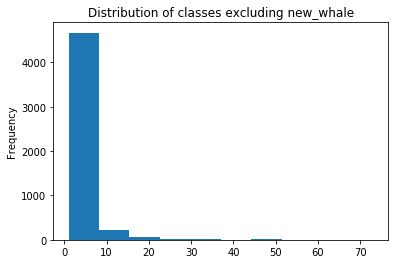

In [12]:
plt.title('Distribution of classes excluding new_whale');
train_df.Id.value_counts()[1:].plot(kind='hist');

In [13]:
train_df.shape, train_df.Id.nunique()
Num_classes = train_df.Id.nunique()

In [14]:
# Basic transformation including resizing, normalizing and converting to tensor 

train_transforms = transforms.Compose([
                                      transforms.Resize((100, 100)),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])
    ])
# data_transforms_test = transforms.Compose([
#                                            transforms.Resize((100, 100)),
#                                            transforms.ToTensor(),
#                                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                                                  std=[0.229, 0.224, 0.225])
# ])


In [15]:
# Encoding labels using onehot encoder

def prepare_labels(y):
    # From here: https://www.kaggle.com/pestipeti/keras-cnn-starter
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    y = onehot_encoded
    return y, label_encoder

In [16]:
y, lab_encoder = prepare_labels(train_df['Id'])

/Users/caitlinaspinall/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [19]:
print(y)

[[0. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 0.]
 [1. 0. 0. 0. ... 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 0.]
 [1. 0. 0. 0. ... 0. 0. 0. 0.]]
